<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://drive.google.com/uc?id=1aiObjySZ8K6IqSRIizbBPvPRFBlUt6mx">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Assignment Info -->  
	  <center>
	    <br>
        <h1>COMP9517 Computer Vision 20T2</h1>
          <h2>Assignment</h2>
        <br>
        <strong>Student Name: Raymond Lu<br>Student Number: z5277884</strong>
	  </center>	
    <!-- Assignment Info -->	
  </div>
<!-- ---------------------------------------------------- -->

## Task 1 Background Estimation

In [1]:
%matplotlib inline
import cv2
import numpy as np
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [41]:
# Read the "Particles.png" in grayscale mode
img_I= cv2.imread("Particles.png",0)

In [42]:
img_I.shape

(320, 394)

In [43]:
WHITE_GRAY = 255 # In grayscale, the gray value of white color is 255

### Self Defined Functions

In [44]:
# Apply min-filter or max-filter of vicinity N on image img_I
def filtered(img_I,N,option='max'):
    img = np.zeros(img_I.shape,np.uint8)
    height = img_I.shape[0]
    width = img_I.shape[1]
    for x in range(height):
        for y in range(width):
            img[x][y]= min_max_gray(img_I,N,x,y,height,width,option)
    return (img)

In [45]:
# find the min or max gray value in the vicinity of N x N neighbourhood
def min_max_gray(img_I,N,x,y,height,width,option):
    top_left,bot_right = [int(x-(N-1)/2),int(y-(N-1)/2)],[int(x+(N-1)/2),int(y+(N-1)/2)] # top-left and bot-right points of N X N neighbourhood
    if(x-(N-1)/2<0):
        top_left[0] =0
    if(x+(N-1)/2>height-1):
        bot_right[0] = height-1
    if (y-(N-1)/2<0):
        top_left[1]=0
    if(y+(N-1)/2>width-1):
        bot_right[1]=width-1
        
    
    if(option=='max'):
        max_gray = 0 # initialization for maximum neighbour gray value
        for xx in range(top_left[0],bot_right[0]+1):
            for yy in range(top_left[1],bot_right[1]+1):
                    # we are finding the max value in the neighbourhood around the pixel
                    if(xx==x and yy==y):
                        continue
                    if (max_gray<img_I[xx][yy]):
                        max_gray = img_I[xx][yy]
        return (max_gray)
    if(option=='min'):
        min_gray = float("inf")# initialization for maximum neighbour gray value
        for xx in range(top_left[0],bot_right[0]+1):
            for yy in range(top_left[1],bot_right[1]+1):
                    # we are finding the max value in the neighbourhood around the pixel
                    if(xx==x and yy==y):
                        continue
                    if (min_gray>img_I[xx][yy]):
                        min_gray = int(img_I[xx][yy])
        return (min_gray) 
    raise ValueError("The input option should be \"max\" or \"min\"!")

In [46]:
# Show image with matplotlib
# cv2.imshow() does not work well on Macbook
def show_img(img):
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    img_plot = plt.imshow(img.astype('uint8'),cmap='gray')
    plt.show()

When it comes to filter, we find the maximum or minimum value in a $N\times N$ neighbourhood of each pixel. Considering each pixel is the center of the $N\times N$ neighbourhood in its iteration, $N$ would be an odd number (otherwise the pixel number on the left hand side would be different from the right hand side, which requires further manual tuning).

### Choose N Value for Image A

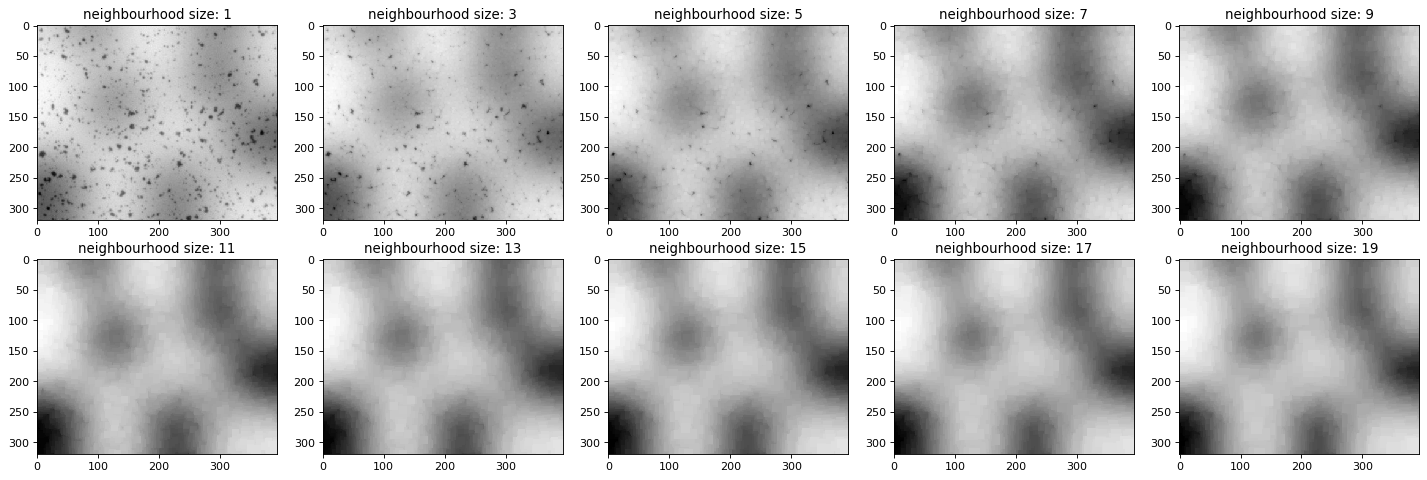

In [66]:
rows = 2
cols = 5
fig = plt.figure(figsize=(18,6), dpi= 80, facecolor='w', edgecolor='k')
axes = []
for N in range(1,rows*cols*2,2):
    img_A = filtered(img_I,N,'max')
    cv2.imwrite('plots/task1/img_A/img'+str(N)+'.png',img_A)
    axes.append(fig.add_subplot(rows,cols,(N+1)//2))
    subplot_title = ("neighbourhood size: "+str(N))
    axes[-1].set_title(subplot_title)
    plt.imshow(img_A.astype('uint8'),cmap='gray')
fig.tight_layout()
plt.savefig('plots/task1_img_A_all.png')
plt.show()

From the result, it can be seen that when $N$ is 13, dark particles in image $I$ disappear altogether. Also, image B should has the same value of $N$ as image A.

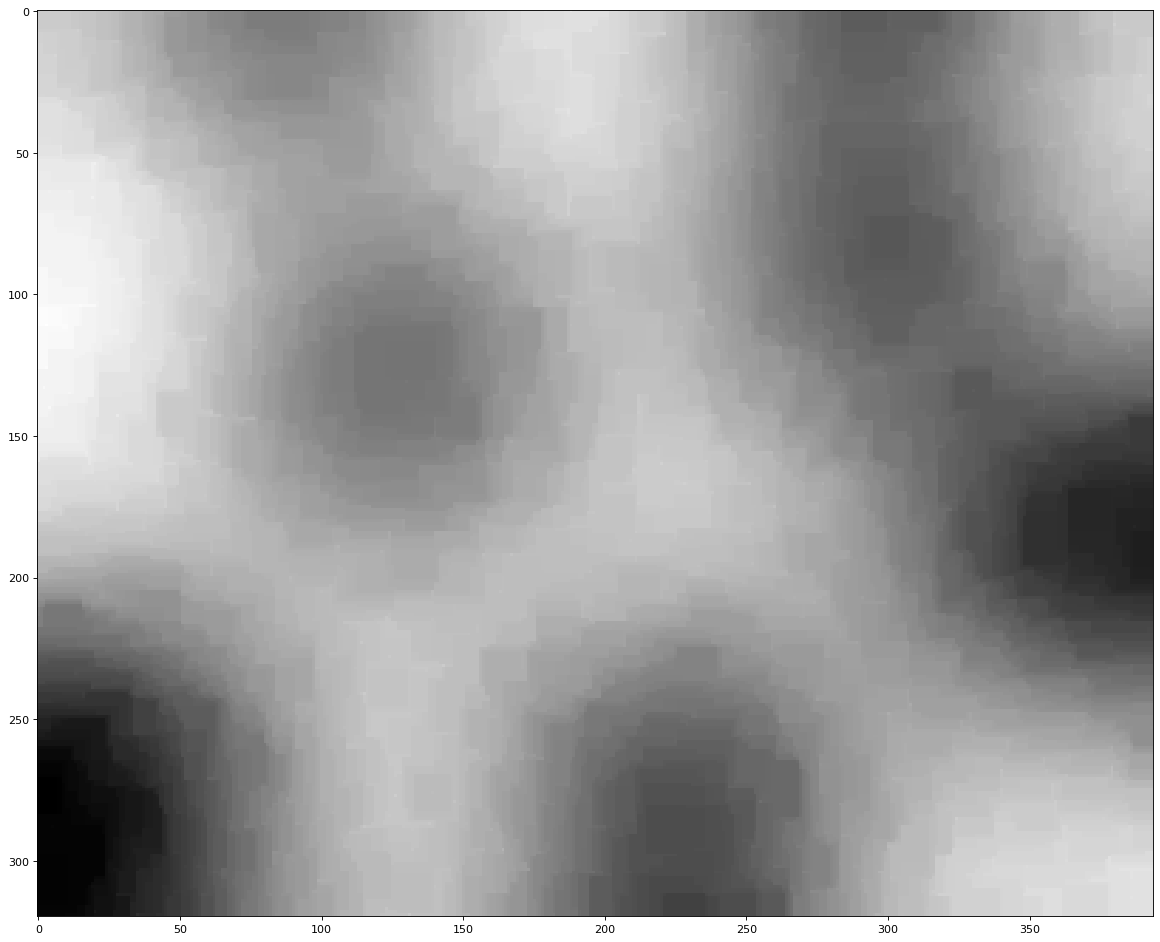

In [47]:
img_A = filtered(img_I,13,'max')
img_B = filtered(img_A,13,'min')
cv2.imwrite('plots/task1/img_B/img'+str(13)+'.png',img_B)
show_img(img_B)

## Task 2 Background Subtraction

In [50]:
# Returns an image by subtracting img_B pixels from img_I pixels
def img_subtraction(img_I,img_B):
    img = np.zeros(img_I.shape,np.uint8)
    for x in range(img_I.shape[0]):
        for y in range(img_I.shape[1]):
            img[x][y] = img_I[x][y]-img_B[x][y]
            if (img[x][y]<0):
                raise ValueError("A pixel in the output has a negative value!")
    return (img)

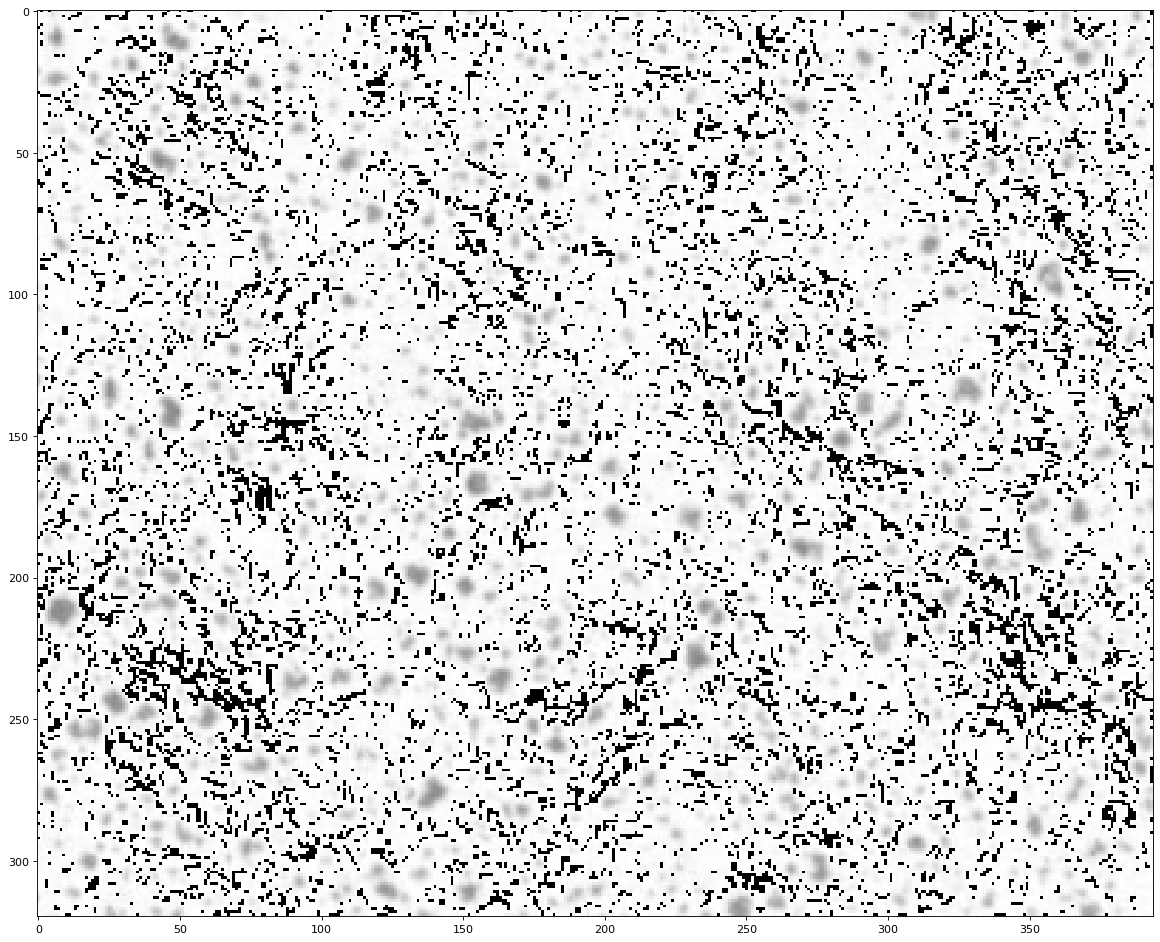

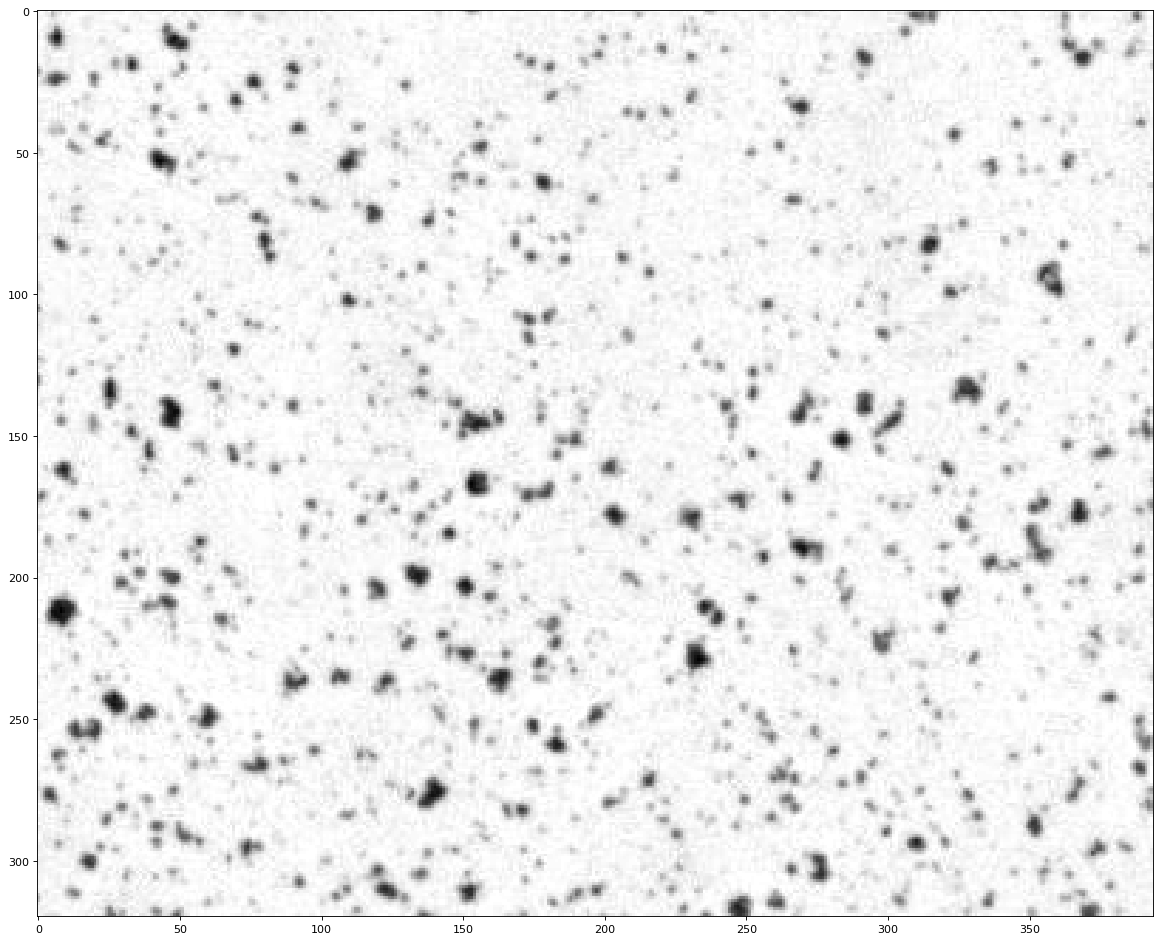

In [54]:
img_O = img_subtraction(img_I,img_B)
show_img(img_O)
# By adding a pure white image, the background turns to white
# However, by doing this, each non-black pixel loses 1 gray value
img_O = WHITE_GRAY*np.ones(img_I.shape,np.uint8)+img_O
img_O = cv2.normalize(img_O,None,0,255,cv2.NORM_MINMAX)
cv2.imwrite('plots/task2/img_O/img_O.png',img_O)
show_img(img_O)

## Task 3

### 1. Remove Shading in Cells.png

In [2]:
img_I= cv2.imread("Cells.png",0)
img_I.shape

(700, 1100)

Same as task 1, $N$ is supposed to be an odd number.

In [65]:
%%time
for N in range(1,40,2):
    img_A = filtered(img_I,N,'min')
    cv2.imwrite('plots/task3/img_A/img'+str(N)+'.png',img_A)

CPU times: user 3h 44min 52s, sys: 1.14 s, total: 3h 44min 53s
Wall time: 3h 46min 36s


From the output images, it could be seen that when N is 27, there becomes no bright cells or flakes on display. Hence, $N$ is set to be 27 in task 3.

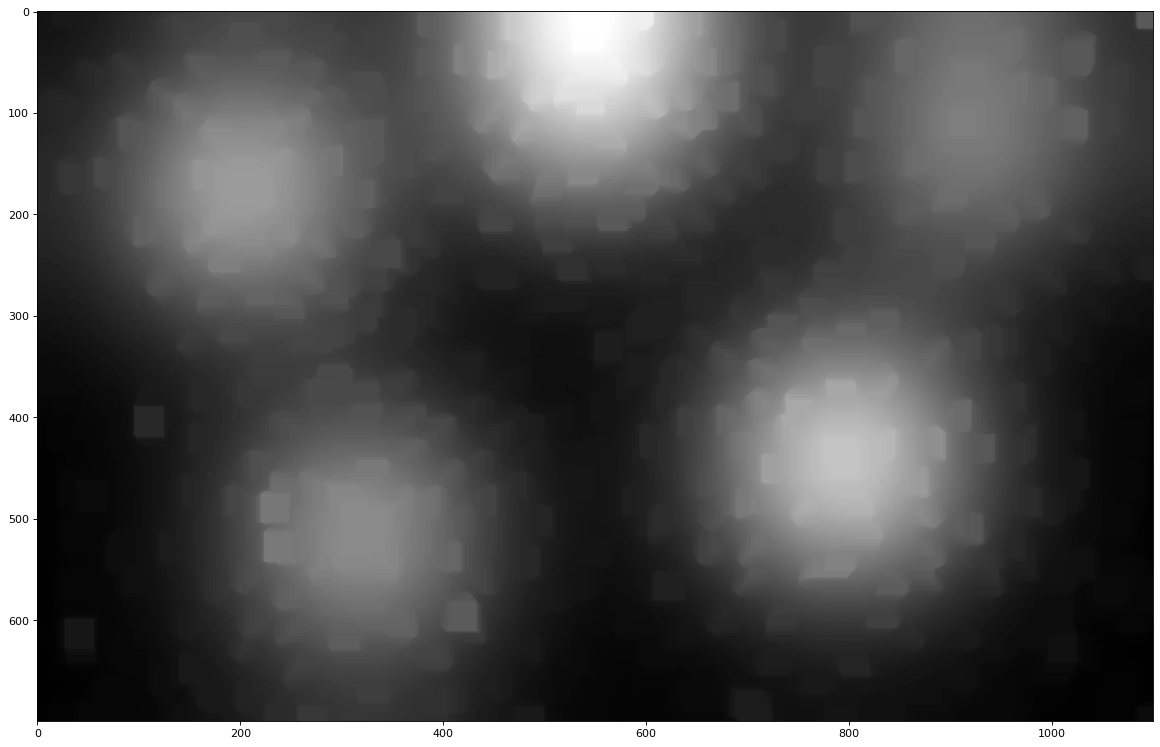

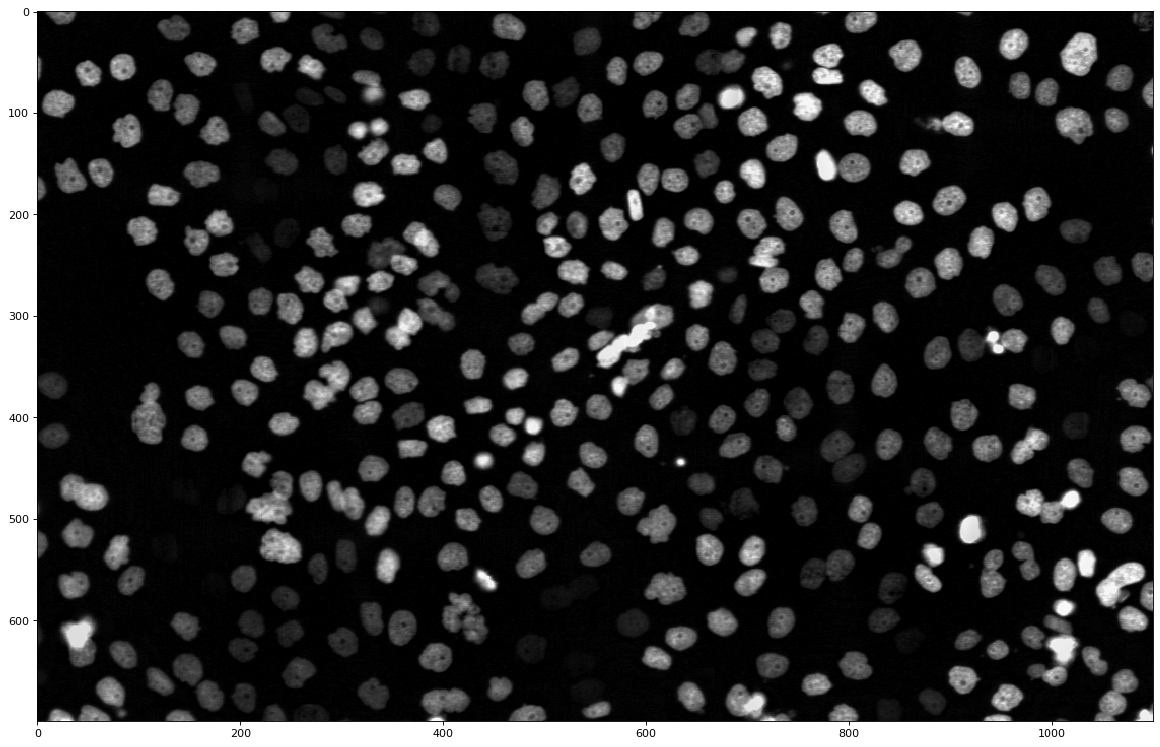

In [5]:
img_A = filtered(img_I,27,'min')
img_B = filtered(img_A,27,'max')
cv2.imwrite("plots/task3/img_B/img_27.png",img_B)
show_img(img_B)
img_O = img_subtraction(img_I,img_B)
img_O = cv2.normalize(img_O,None,0,255,cv2.NORM_MINMAX)
cv2.imwrite("plots/task3/img_O/img_O.png",img_O)
show_img(img_O)

### 2. Generalization Approach

Here are the functions defined in previous two tasks.

In [4]:
# Apply min-filter or max-filter of vicinity N on image img_I
def filtered(img_I,N,option='max'):
    img = np.zeros(img_I.shape,np.uint8)
    height = img_I.shape[0]
    width = img_I.shape[1]
    for x in range(height):
        for y in range(width):
            img[x][y]= min_max_gray(img_I,N,x,y,height,width,option)
    return (img)

# find the min or max gray value in the vicinity of N x N neighbourhood
def min_max_gray(img_I,N,x,y,height,width,option):
    top_left,bot_right = [int(x-(N-1)/2),int(y-(N-1)/2)],[int(x+(N-1)/2),int(y+(N-1)/2)] # top-left and bot-right points of N X N neighbourhood
    if(x-(N-1)/2<0):
        top_left[0] =0
    if(x+(N-1)/2>height-1):
        bot_right[0] = height-1
    if (y-(N-1)/2<0):
        top_left[1]=0
    if(y+(N-1)/2>width-1):
        bot_right[1]=width-1
        
    
    if(option=='max'):
        max_gray = 0 # initialization for maximum neighbour gray value
        for xx in range(top_left[0],bot_right[0]+1):
            for yy in range(top_left[1],bot_right[1]+1):
                    if (max_gray<img_I[xx][yy]):
                        max_gray = img_I[xx][yy]
        return (max_gray)
    if(option=='min'):
        min_gray = float("inf")# initialization for maximum neighbour gray value
        for xx in range(top_left[0],bot_right[0]+1):
            for yy in range(top_left[1],bot_right[1]+1):
                    if (min_gray>img_I[xx][yy]):
                        min_gray = int(img_I[xx][yy])
        return (min_gray) 
    raise ValueError("The input option should be \"max\" or \"min\"!")
    
# Show image with matplotlib
# cv2.imshow() does not work well on Macbook
def show_img(img):
    fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    img_plot = plt.imshow(img.astype('uint8'),cmap='gray')
    plt.show()
    
# Returns an image by subtracting img_B pixels from img_I pixels
def img_subtraction(img_I,img_B):
    img = np.zeros(img_I.shape,np.uint8)
    for x in range(img_I.shape[0]):
        for y in range(img_I.shape[1]):
            img[x][y] = img_I[x][y]-img_B[x][y]
            if (img[x][y]<0):
                raise ValueError("A pixel in the output has a negative value!")
    return (img)

The functions below are for the general algorithm specifically.

In [50]:
#Remove shading artifacts in image I with N x N neighborhood
def shading_removal(img_I,N,M):
    WHITE_GRAY = 255 # In grayscale, the gray value of white color is 255
    if(M==0): # The input image is in white background
        img_A = filtered(img_I,N,'max')
        img_B = filtered(img_A,N,'min')
        img_O = img_subtraction(img_I,img_B) + WHITE_GRAY*np.ones(img_I.shape,np.uint8)
        img_O = cv2.normalize(img_O,None,0,255,cv2.NORM_MINMAX)
        return (img_O)
    if(M==1): # The input image is in black background
        img_A = filtered(img_I,N,'min')
        img_B = filtered(img_A,N,'max')
        img_O = img_subtraction(img_I,img_B)
        img_O = cv2.normalize(img_O,None,0,255,cv2.NORM_MINMAX)
        return (img_O)
        

In [51]:
def user_shading_removal():
    print('''This function is to remove shading in a given grayscale image. If the background of the input image
    is black, please set M\'s value to be 0. Otherwise, if the background is white, please set M\'s value
    to be 1. Also, the size of neighbourhood of a pixel N in the image processing is set by the user.''')
    M = int(input("Please input the value of M (0 or 1): "))
    if(M!=0 and M!=1):
        raise ValueError("M's value should be 0 or 1!")
    N = int(input("Please input the value of N (odd number): "))
    if(N%2!=1):
        raise ValueError("N's value should be an odd number!")
    img_path = input("Please input the path of image to be processed: ")
    if(img_path==""):
        raise ValueError("The image path cannot be empty!")
    img_I = cv2.imread(img_path,0)
    if(img_I.any()==None):
        raise ValueError("The image path is invalid!")
    
    print("Process shading removal for ",img_path," now")
    img_O = shading_removal(img_I,N,M)
    show_img(img_O)
    output_file_name = img_path[:img_path.find(".")]+"_shading_removal.png"
    cv2.imwrite(output_file_name,img_O)

This function is to remove shading in a given grayscale image. If the background of the input image
    is black, please set M's value to be 0. Otherwise, if the background is white, please set M's value
    to be 1. Also, the size of neighbourhood of a pixel N in the image processing is set by the user.
Please input the value of M (0 or 1): 0
Please input the value of N (odd number): 13
Please input the path of image to be processed: Particles.png
Process shading removal for  Particles.png  now


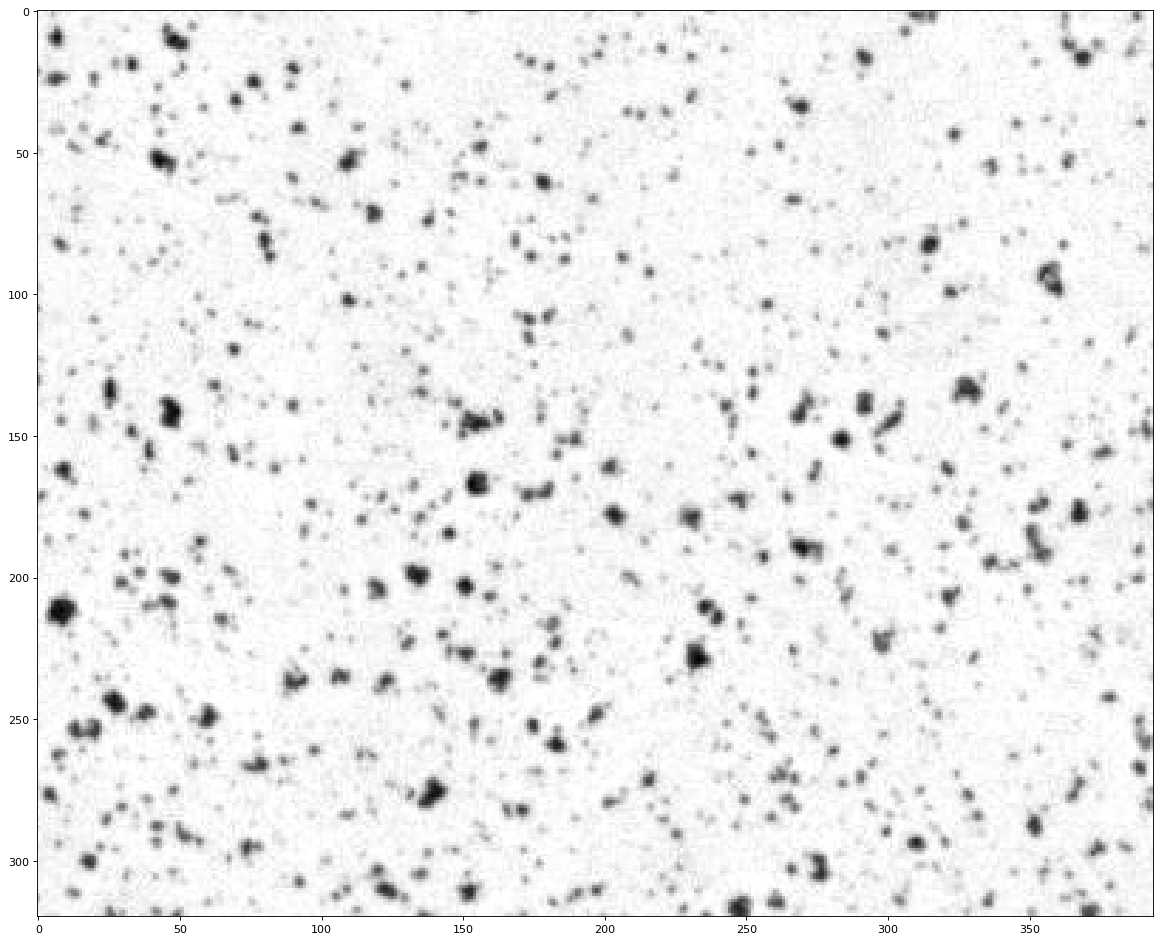

In [52]:
user_shading_removal()

This function is to remove shading in a given grayscale image. If the background of the input image
    is black, please set M's value to be 0. Otherwise, if the background is white, please set M's value
    to be 1. Also, the size of neighbourhood of a pixel N in the image processing is set by the user.
Please input the value of M (0 or 1): 1
Please input the value of N (odd number): 27
Please input the path of image to be processed: Cells.png
Process shading removal for  Cells.png  now


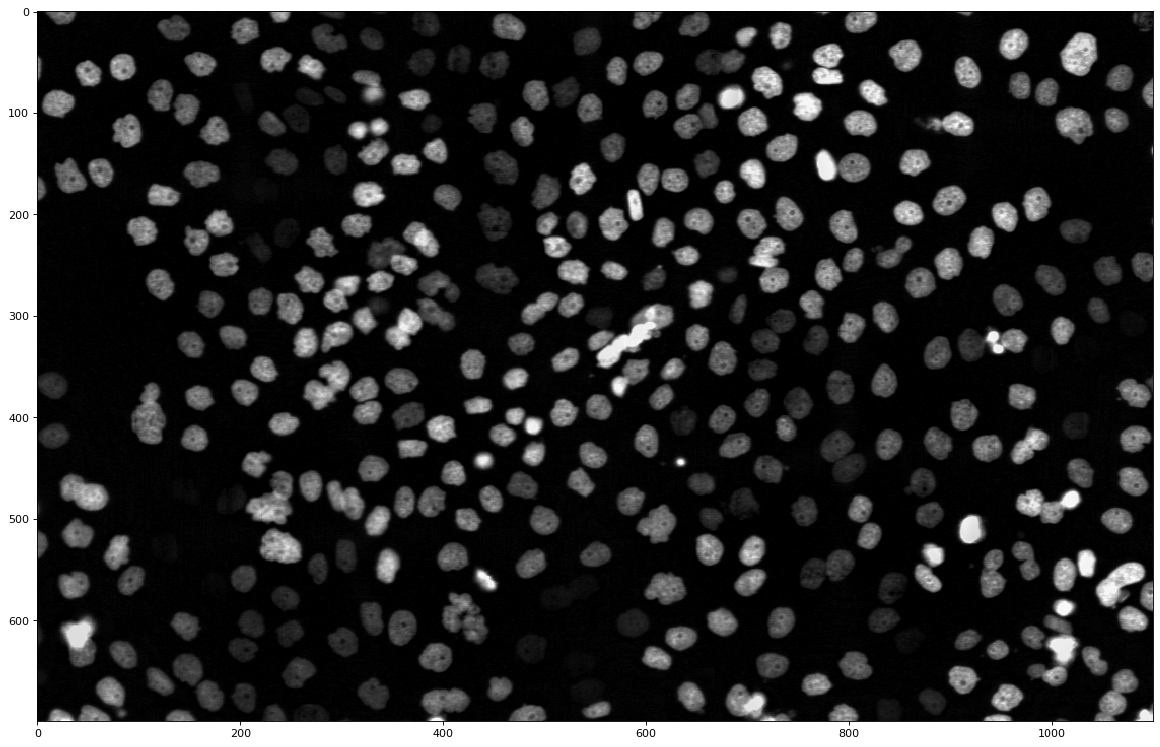

In [53]:
user_shading_removal()